In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")
import xfinai_config

In [2]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
import pandas as pd

from pyecharts import options as opts
from pyecharts.charts import Line, Kline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

In [3]:
#设定一组美丽的颜色
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

## Part 1 Show Futures Price Series

In [4]:
def show_price_series(future_index):
    df_raw = pd.read_pickle(f'{xfinai_config.raw_data_path}/{future_index}_{xfinai_config.time_freq}.pkl').loc[xfinai_config.data_start_time:]
    
    fig=plt.figure(figsize=(16,4),dpi=800)
    ax=fig.add_subplot()
    
    x=df_raw.index.date
    y=df_raw.close.values
    
    ax.plot(y,color=r_hex, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 收盘价')

    ax.legend(loc=0)
    ax.set_title(f'{future_index.upper()}合约 收盘价走势')
    ax.set_xticks(range(0,len(x),500)) 
    ax.set_xticklabels([x[i] for i in ax.get_xticks()],rotation=45)
    fig.subplots_adjust(bottom=0.2)
    plt.savefig(f'{xfinai_config.data_hub_path}/close_price/{future_index}.png')
    

In [5]:
def show_summary(future_index):
    df_raw = pd.read_pickle(f'{xfinai_config.raw_data_path}/{future_index}_{xfinai_config.time_freq}.pkl').loc[xfinai_config.data_start_time:]
    df_raw.describe().to_csv(f'{xfinai_config.data_hub_path}/price_summary/{future_index}_summary.csv')

In [6]:
for future_index in xfinai_config.futures_index_map:
    show_summary(future_index)

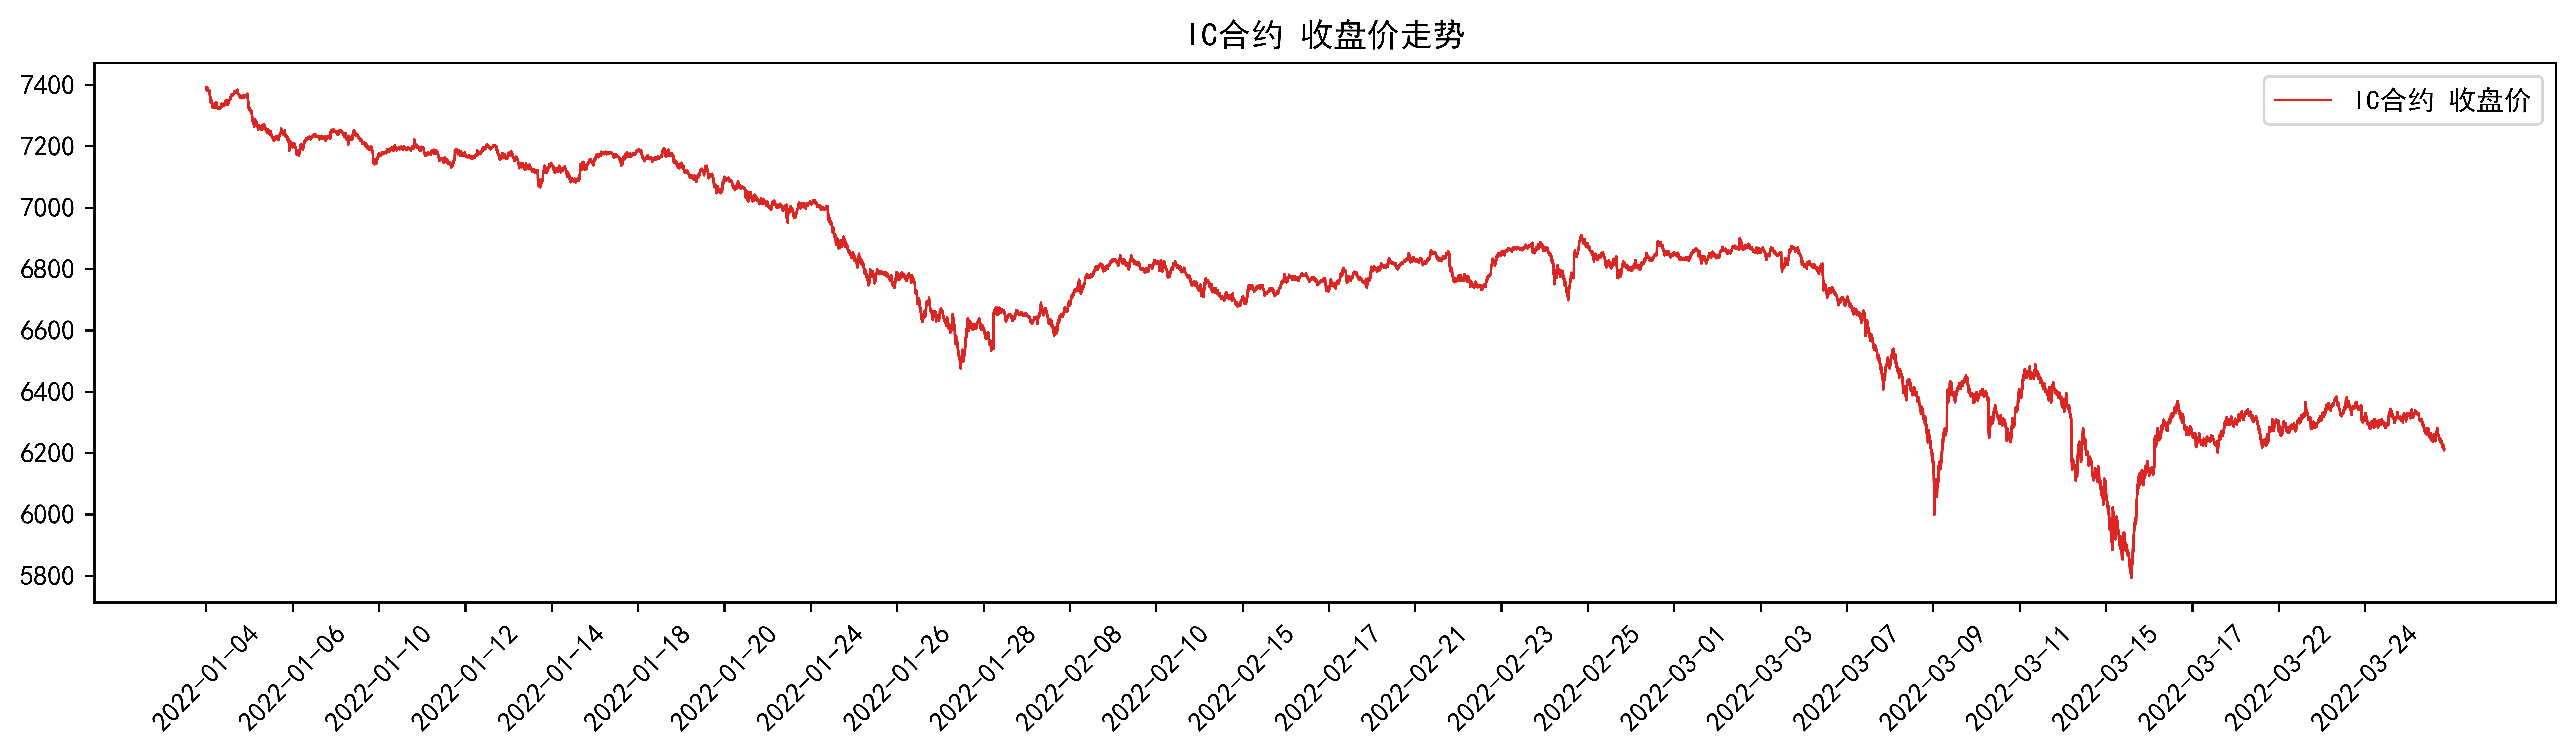

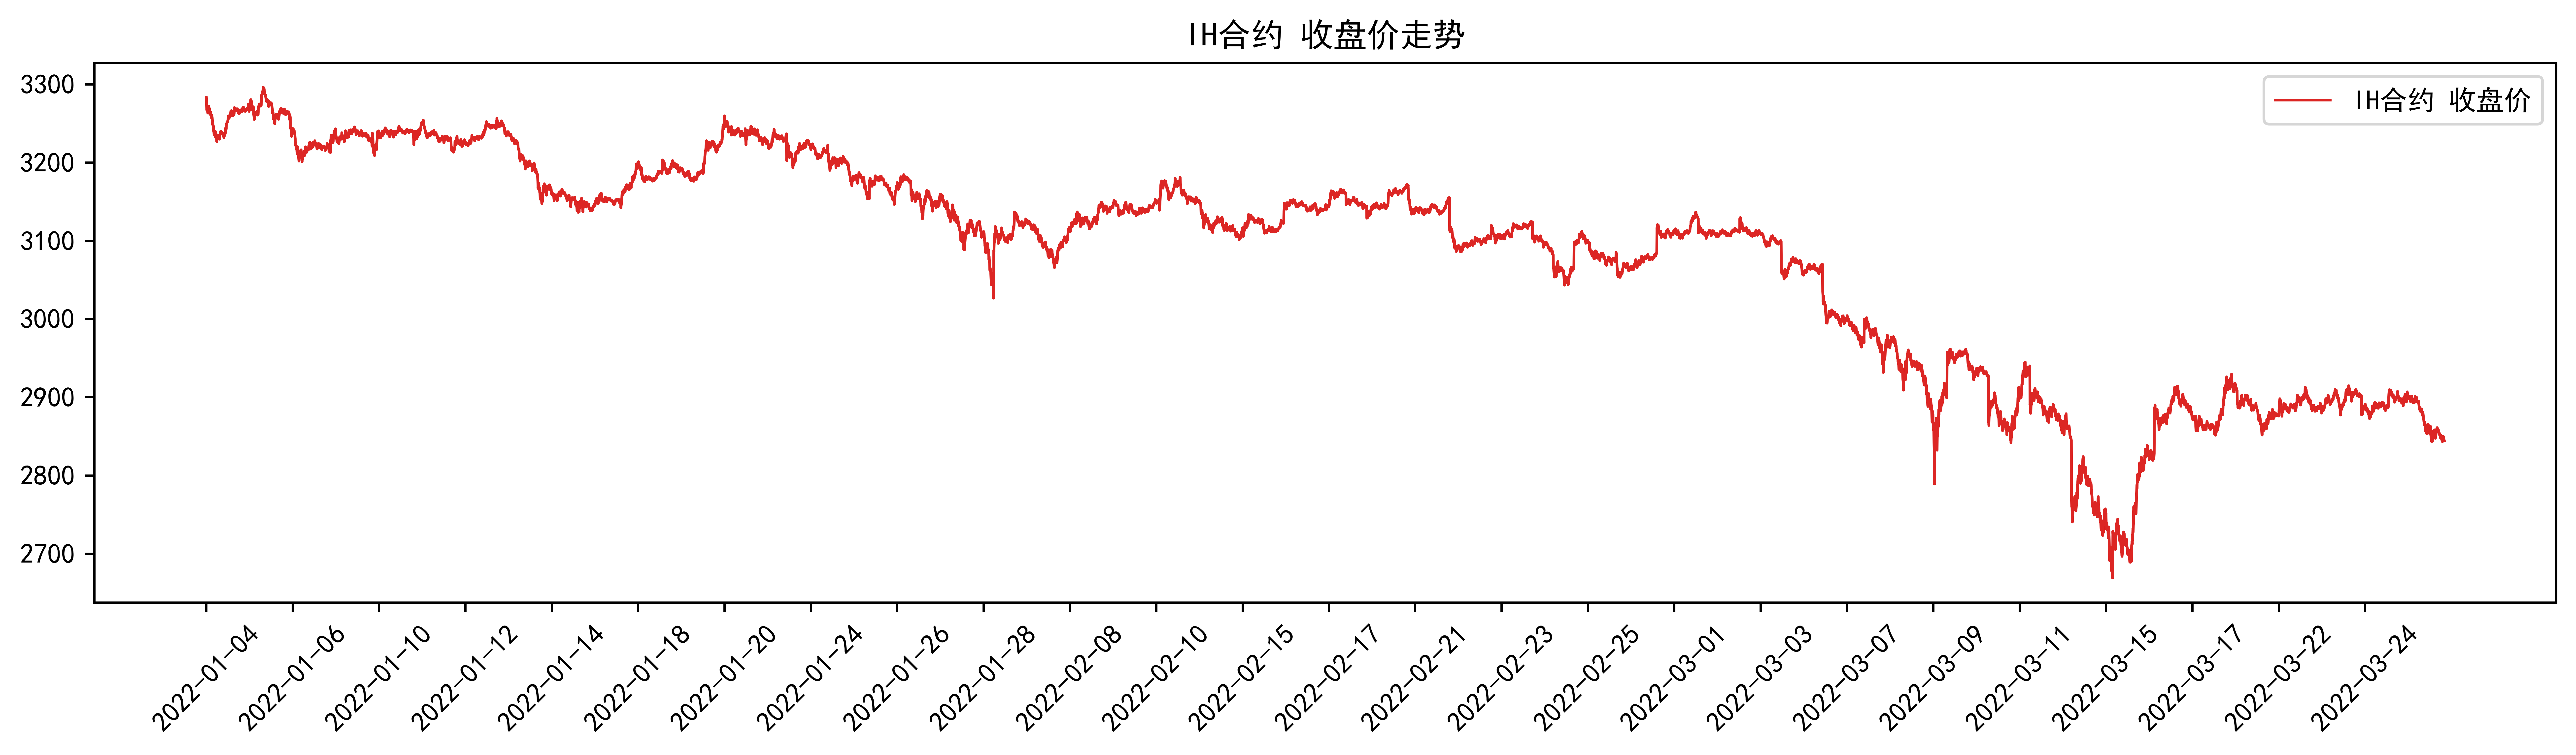

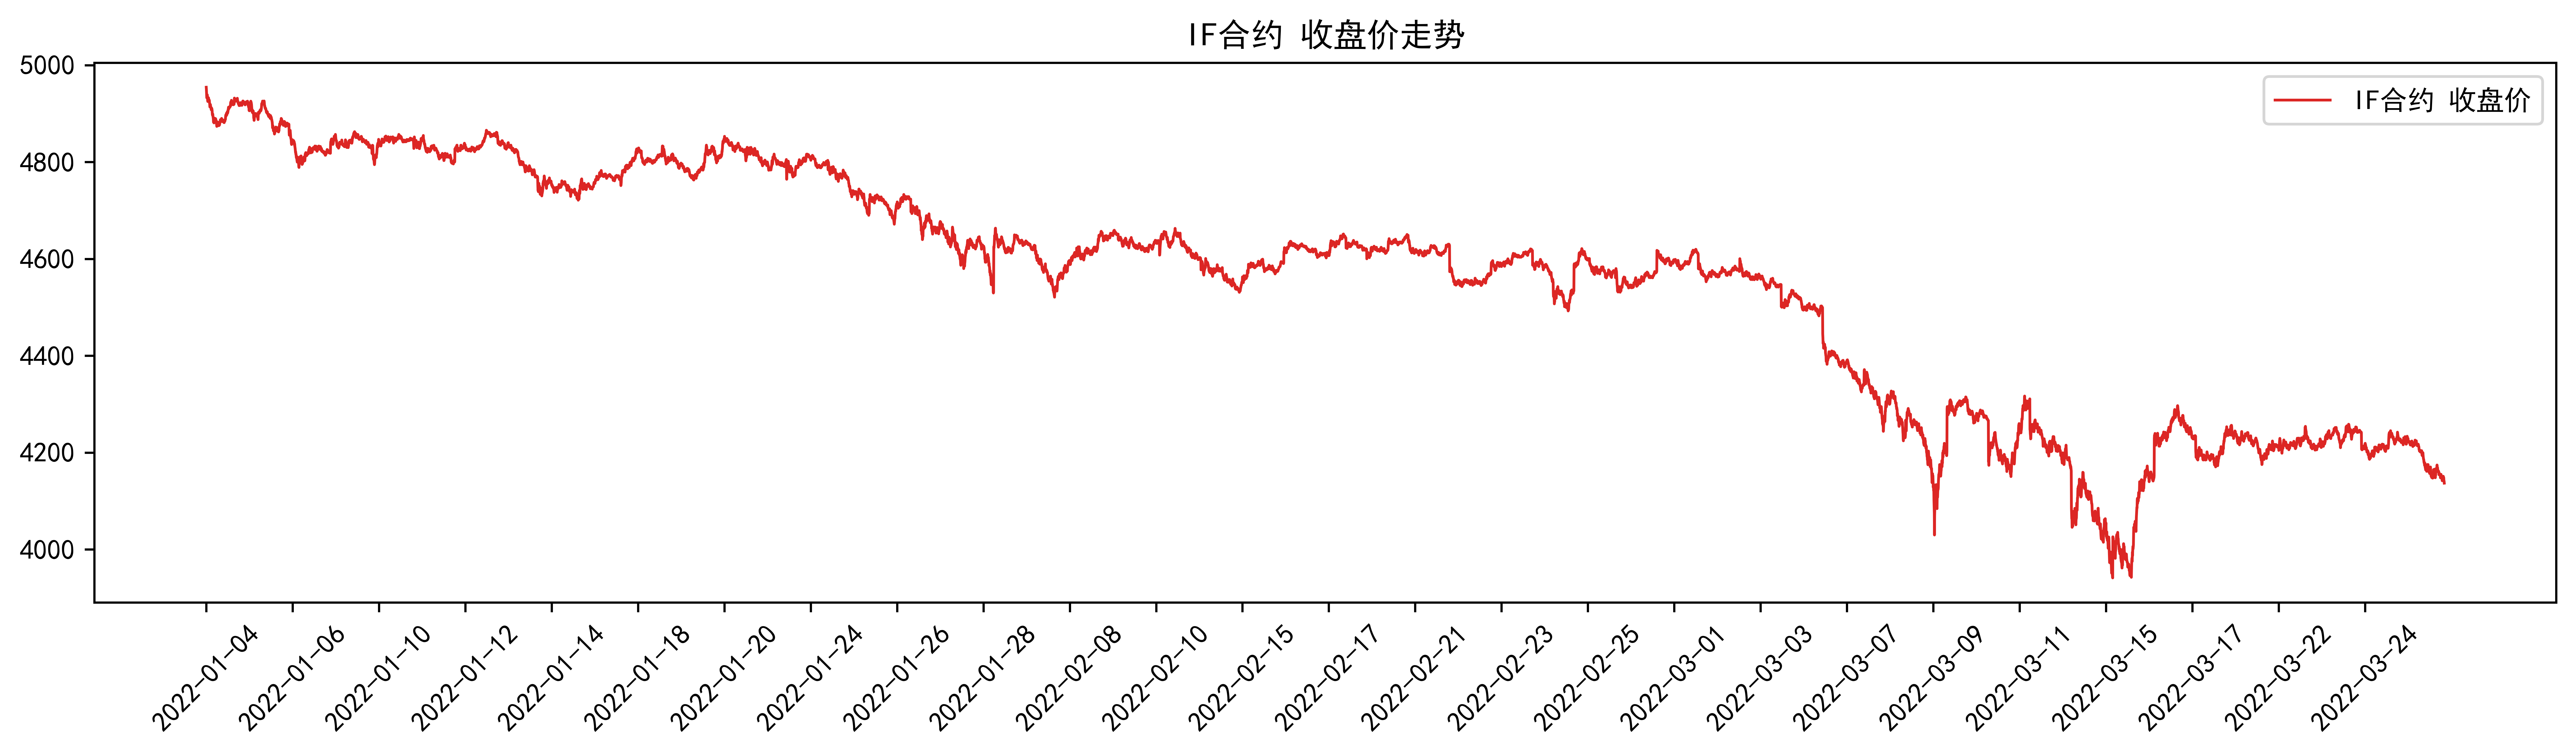

In [7]:
for future_index in xfinai_config.futures_index_map:
    show_price_series(future_index)

## Part 2 Show Return Series

In [8]:
def load_featured_data(future_index):
    df_featured_train = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_train_data.pkl')
    df_featured_val = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_val_data.pkl')
    df_featured_test = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_test_data.pkl')
    df_concated = pd.concat([df_featured_train, df_featured_val, df_featured_test])
    return df_concated

def show_return_series(future_index):
    df_featured = load_featured_data(future_index)
    
    fig=plt.figure(figsize=(16,4),dpi=300)
    ax=fig.add_subplot()
    
    x=df_featured.index.date
    y=df_featured[xfinai_config.label].values
    
    ax.plot(y, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 收益率')

    ax.legend(loc=0, fontsize='x-large')
    ax.set_title(f'{future_index.upper()}合约 收益率走势', fontsize='x-large')
    ax.set_xticks(range(0,len(x),500)) 
    ax.set_xticklabels([x[i] for i in ax.get_xticks()],rotation=45)
    
    fig.subplots_adjust(bottom=0.2)
    plt.savefig(f'{xfinai_config.data_hub_path}/return_trend/{future_index}.png')


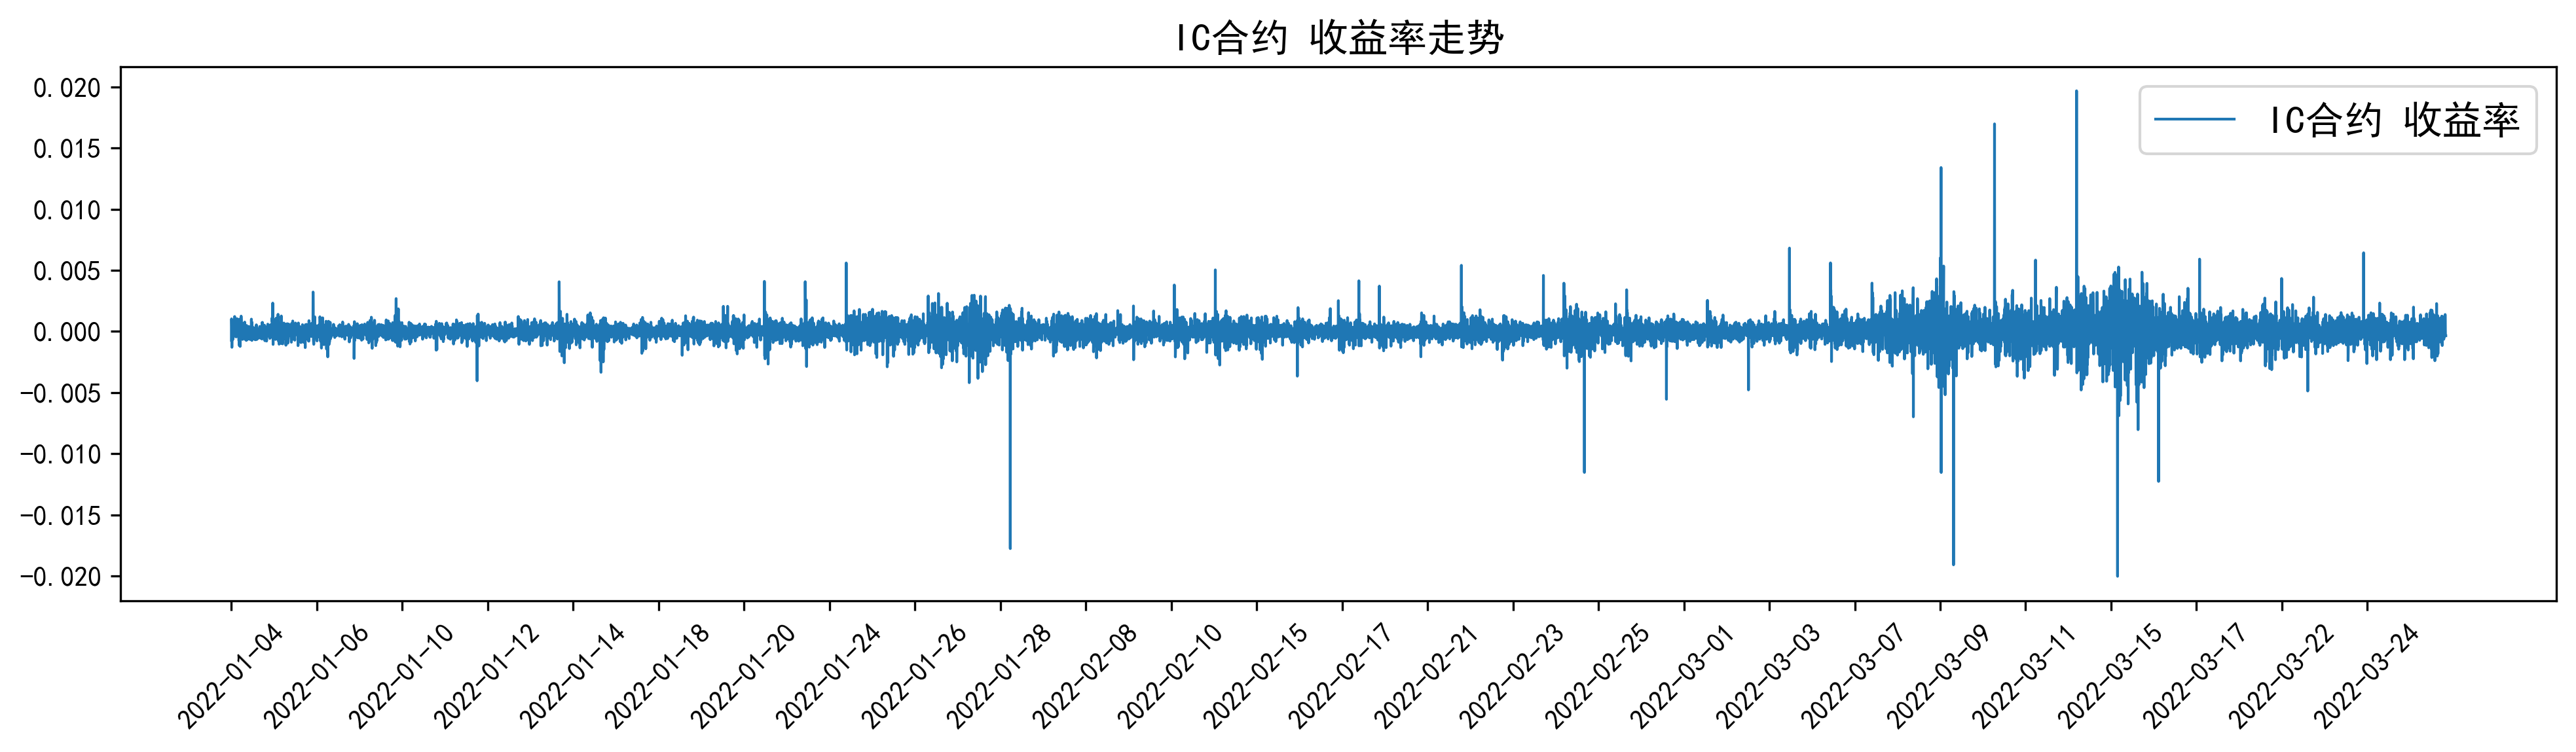

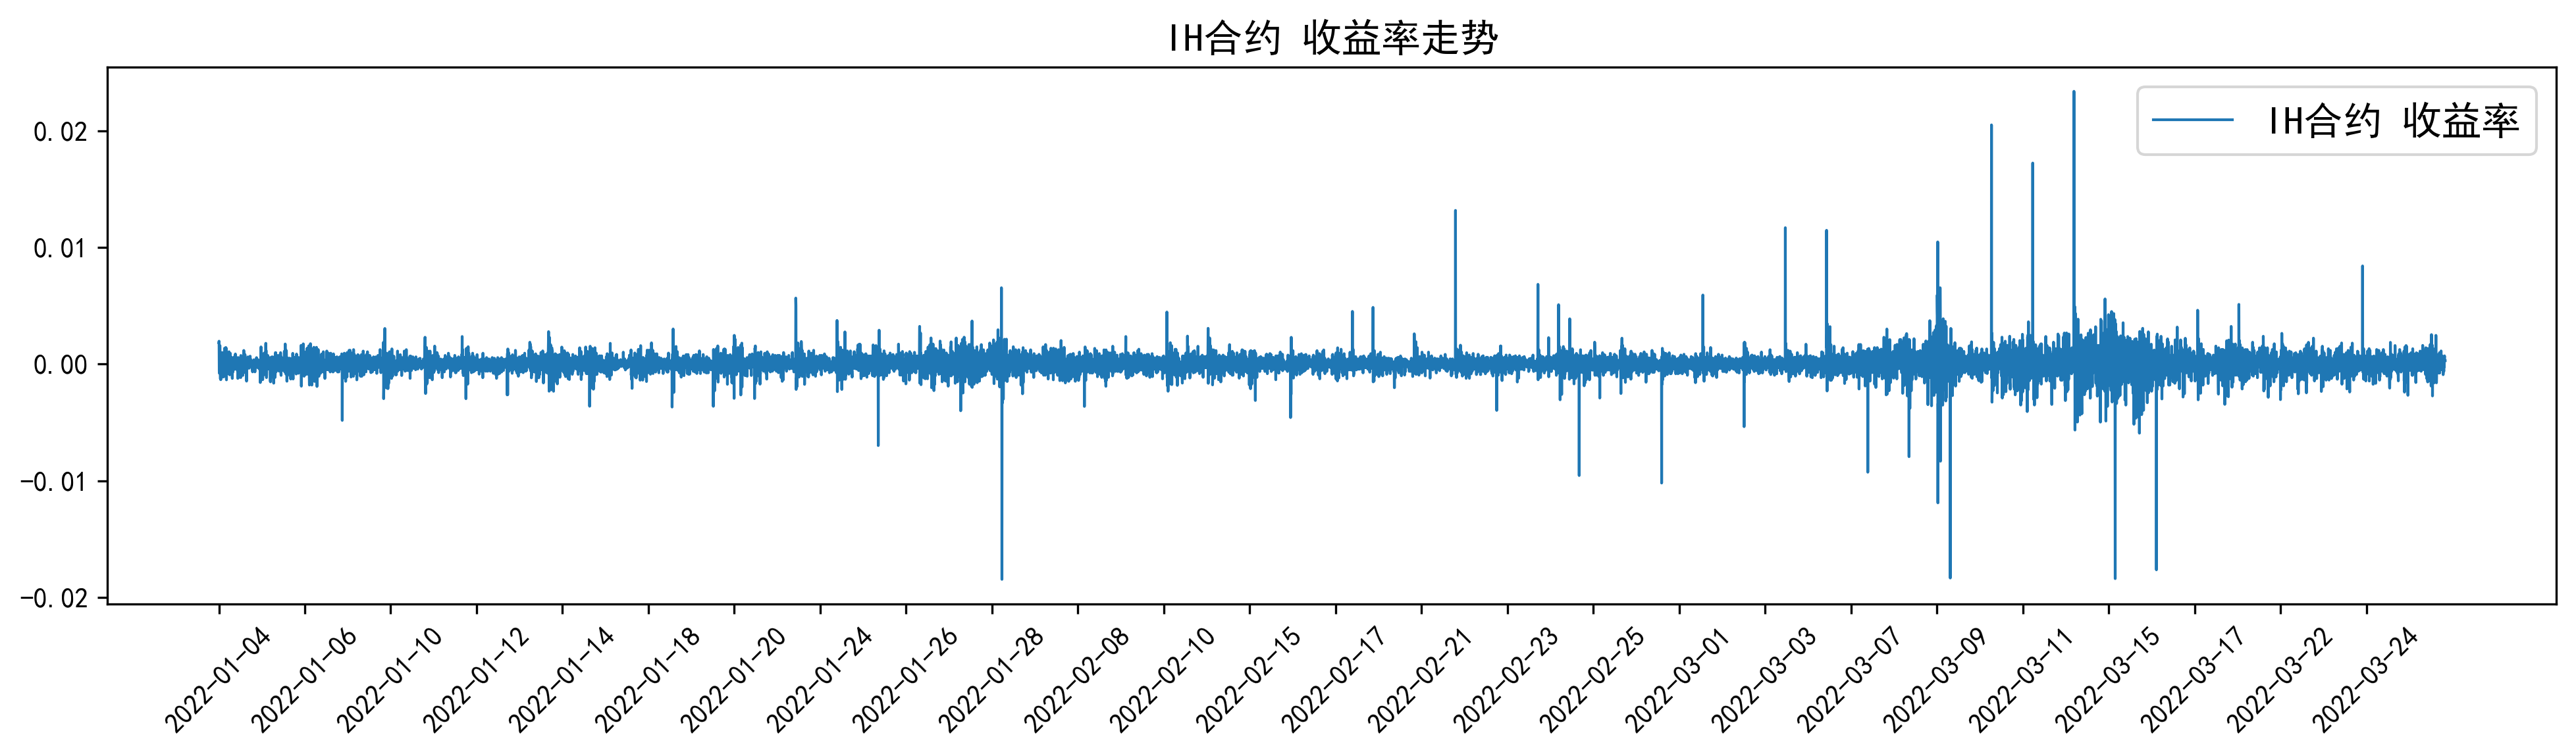

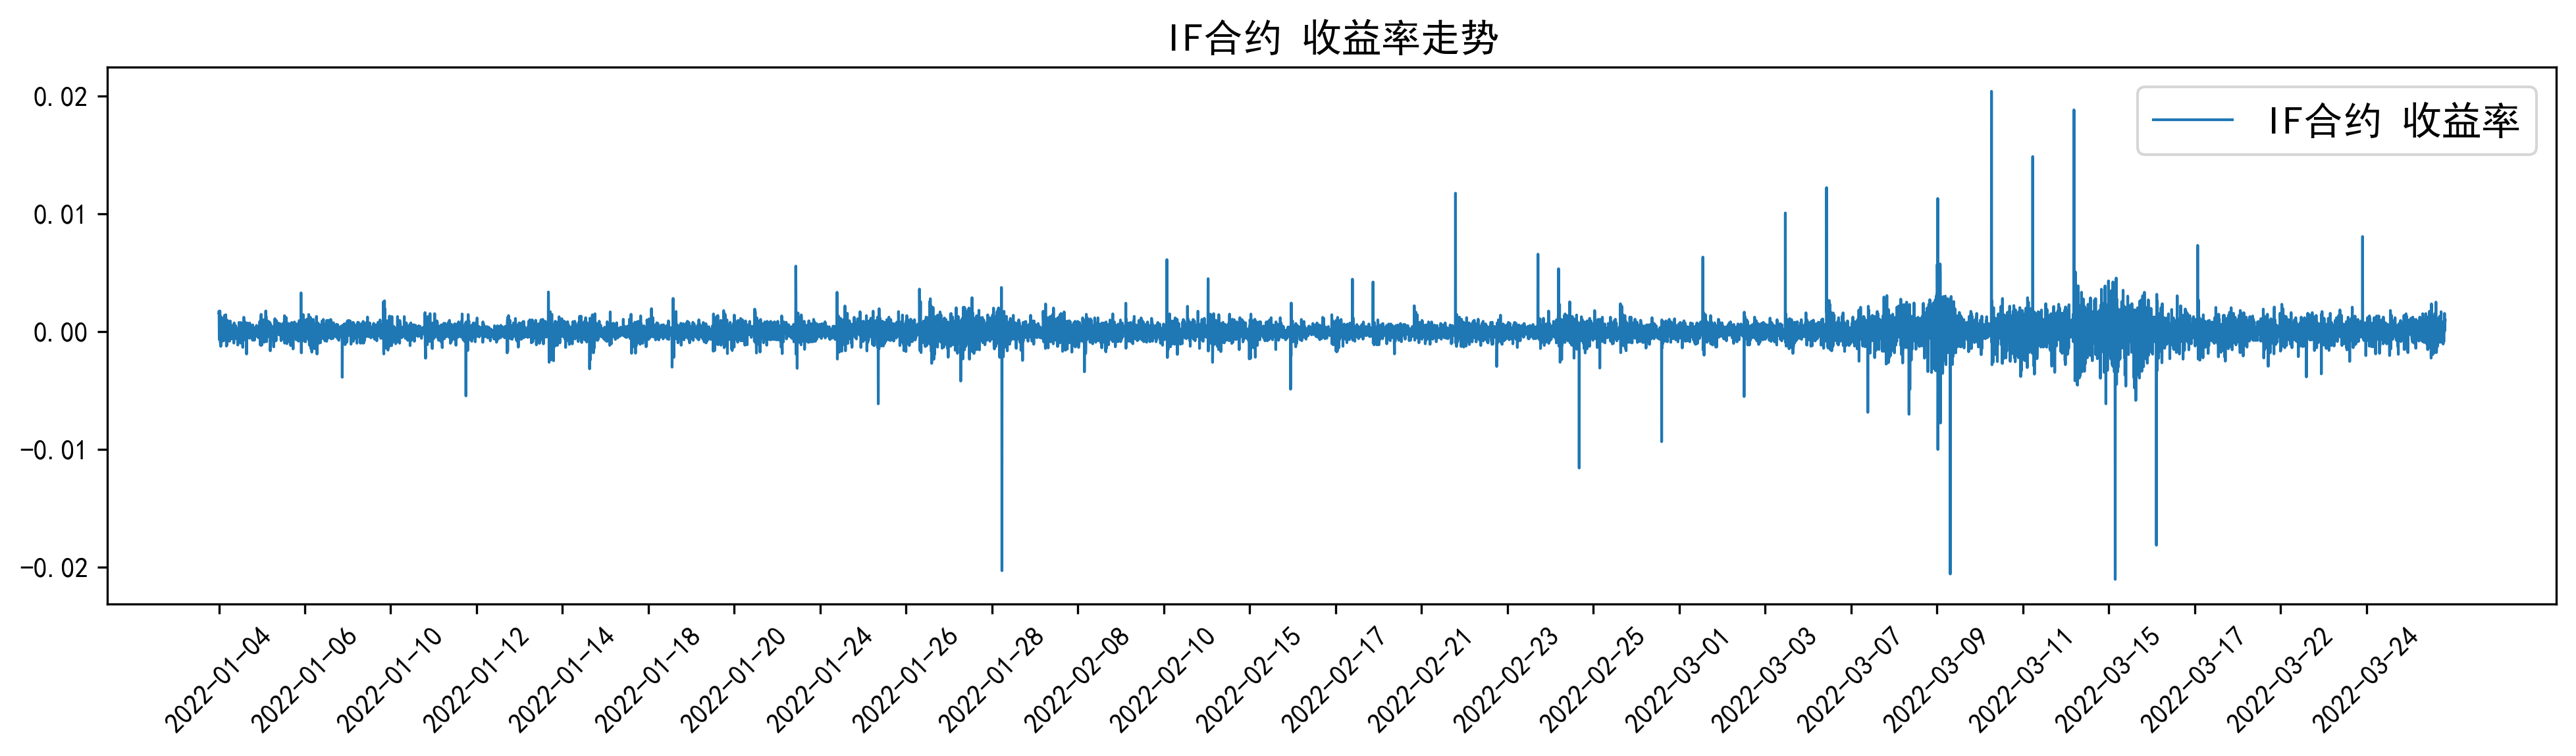

In [9]:
for future_index in xfinai_config.futures_index_map:
    show_return_series(future_index)

## Part 3 Show Return Hist

In [58]:
def show_return_hist(future_index):
    df_featured = load_featured_data(future_index)
    
    fig=plt.figure(figsize=(6,3),dpi=300)
    ax=fig.add_subplot()
    
    y=df_featured[xfinai_config.label].values
    sns.histplot(df_featured[xfinai_config.label].values,bins=150)
    
    plt.xlabel('收益率')
    plt.ylabel('频数')
    ax.set_title(f'{future_index.upper()}合约 收益率频数分布直方图')

    
    fig.subplots_adjust(bottom=0.2)
    plt.savefig(f'{xfinai_config.data_hub_path}/return_hist/{future_index}.png')

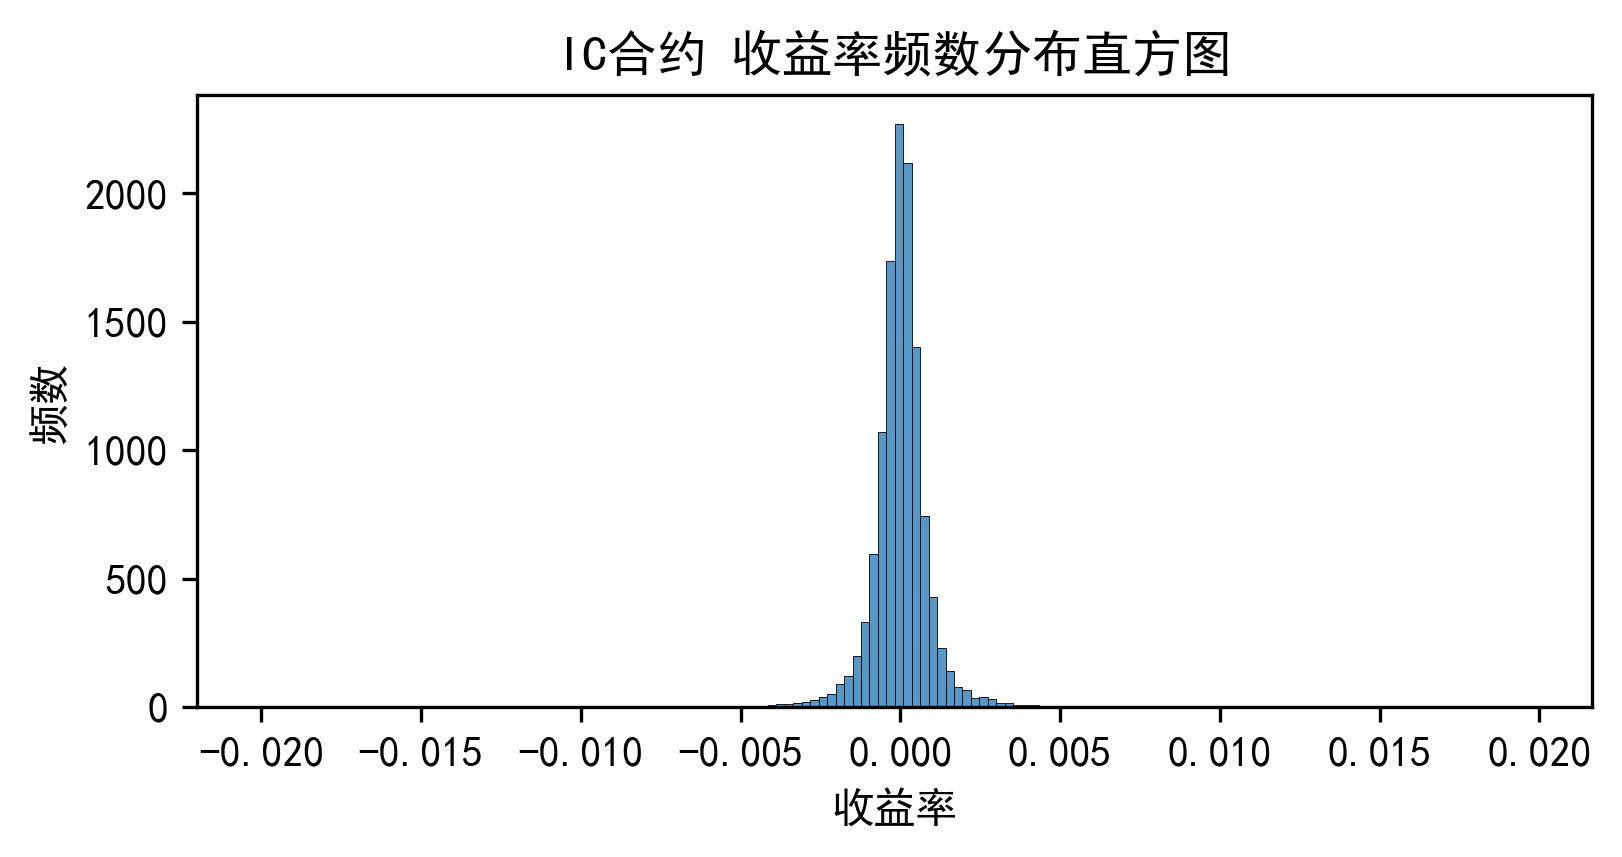

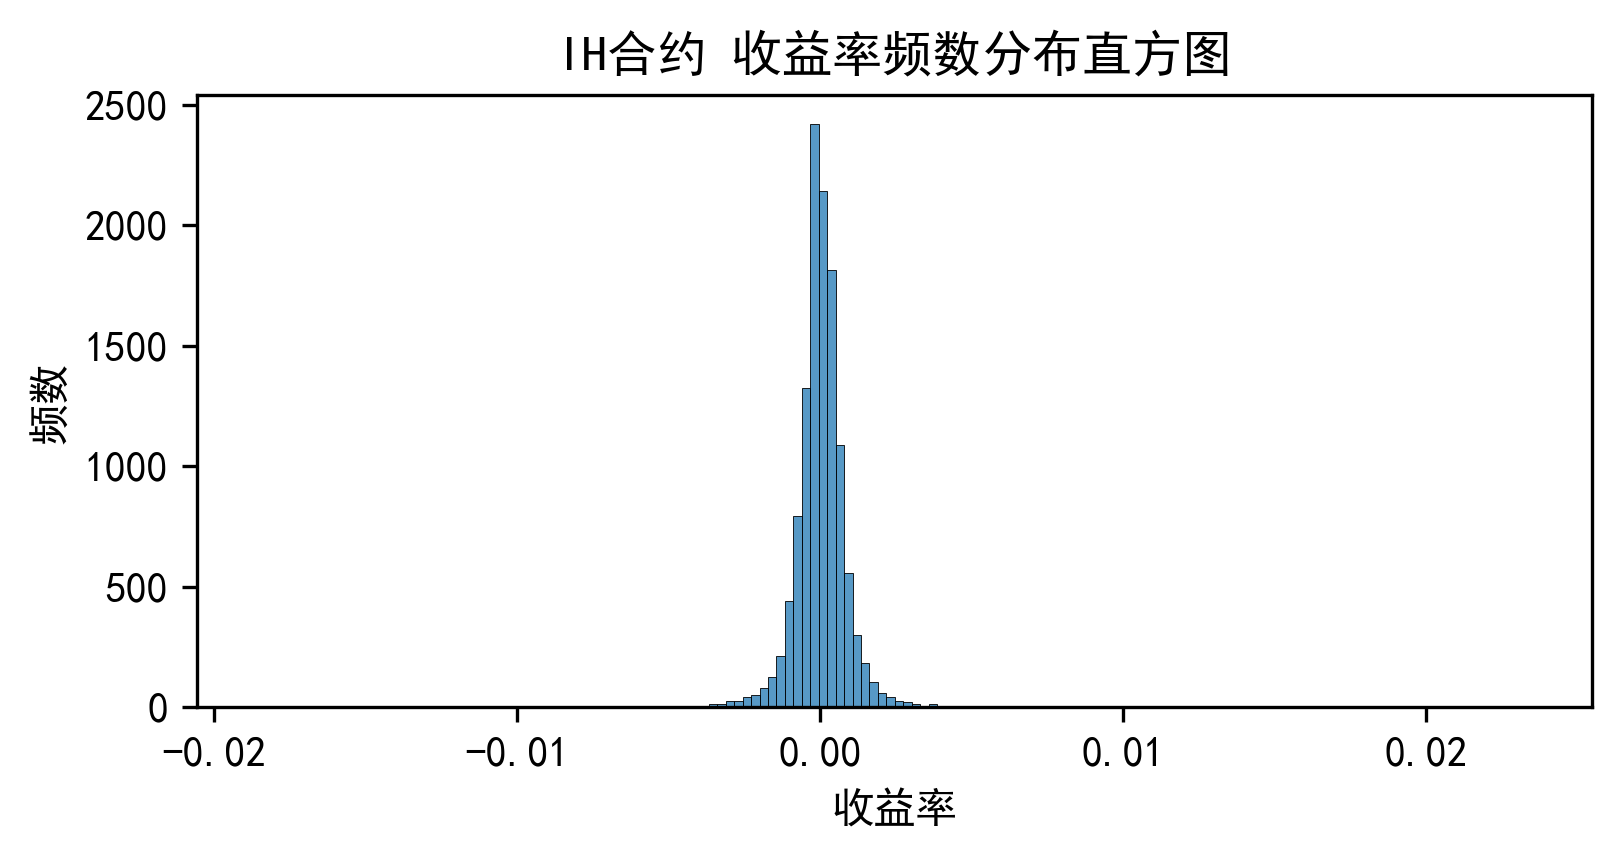

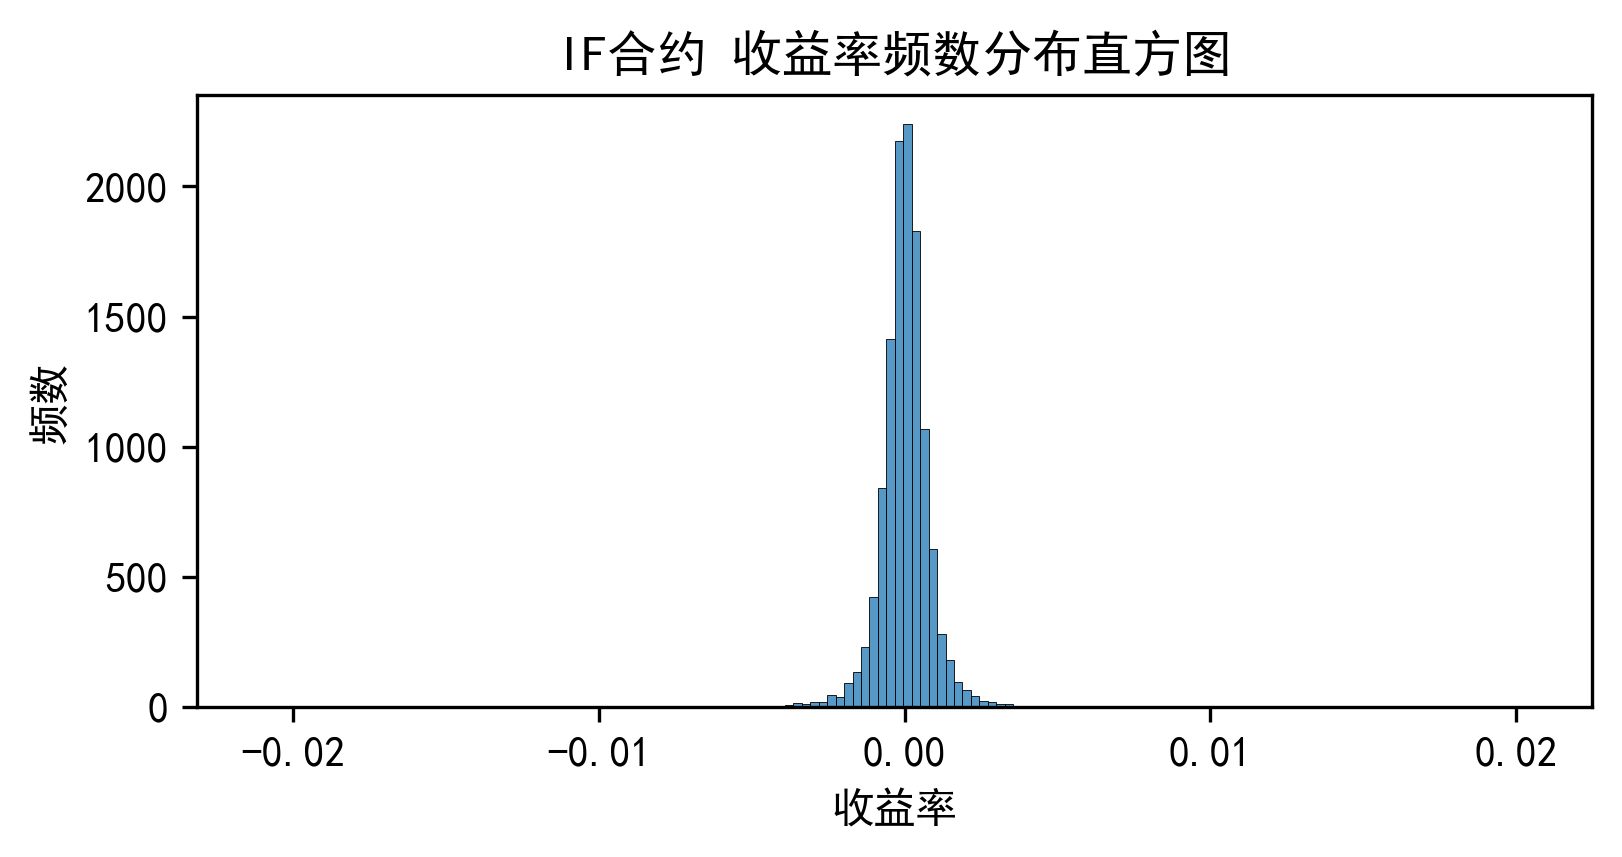

In [59]:
for future_index in xfinai_config.futures_index_map:
    show_return_hist(future_index)

## Part -1 Migic Resuly

In [8]:
def migic_pred(real_value_series, adjust_factor):
    mean_value = real_value_series.mean()
    val_value = real_value_series.var()
    pred_series = real_value_series - np.random.normal(loc=mean_value, scale=(val_value**0.5)*adjust_factor, size=[len(real_value_series)])
    return list(pred_series)

In [9]:
def load_splited_featured_data(future_index):
    df_featured_train = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_train_data.pkl')
    df_featured_val = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_val_data.pkl')
    df_featured_test = pd.read_pickle(f'{xfinai_config.featured_data_path}/{future_index}_test_data.pkl')
    return df_featured_train, df_featured_val, df_featured_test

def show_result(future_index):
    df_featured_train, df_featured_val, df_featured_test = load_splited_featured_data(future_index)
    x = list(df_featured_train.index) + list(df_featured_val.index) + list(df_featured_test.index)
    
    fig=plt.figure(figsize=(16,4),dpi=300)
    ax=fig.add_subplot()
    
    y_train_real =df_featured_train[xfinai_config.label].values
    y_val_real =df_featured_val[xfinai_config.label].values
    y_test_real =df_featured_test[xfinai_config.label].values
    
    y_train_pred = migic_pred(y_train, adjust_factor=0.5)
    y_val_pred = migic_pred(y_val_real, adjust_factor=0.1)
    y_test_pred = migic_pred(y_test_real, adjust_factor=0.1)
    pred_series = y_train_pred+y_val_pred+y_test_pred
    
    ax.plot(range(len(x)), pred_series, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 预测值', color='orange')
    
    ax.plot(range(df_featured_train.shape[0]), y_train_real, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 训练集')
    ax.plot(range(df_featured_train.shape[0], df_featured_train.shape[0]+df_featured_val.shape[0]), y_val_real, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 验证集', color='gray')
    ax.plot(range(df_featured_train.shape[0]+df_featured_val.shape[0], len(x)), y_test_real, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 测试集', color='r')
#     ax.plot(range(len(x)), pred_series, linewidth=1, linestyle='-',label=f'{future_index.upper()}合约 预测值', color='orange')


    ax.legend(loc=0, fontsize='x-large')
    ax.set_title(f'{future_index.upper()}合约 ', fontsize='x-large')
    ax.set_xticks(range(0,len(x),500)) 
    ax.set_xticklabels([x[i] for i in ax.get_xticks()],rotation=45)
    
    plt.show()

NameError: name 'y_train' is not defined

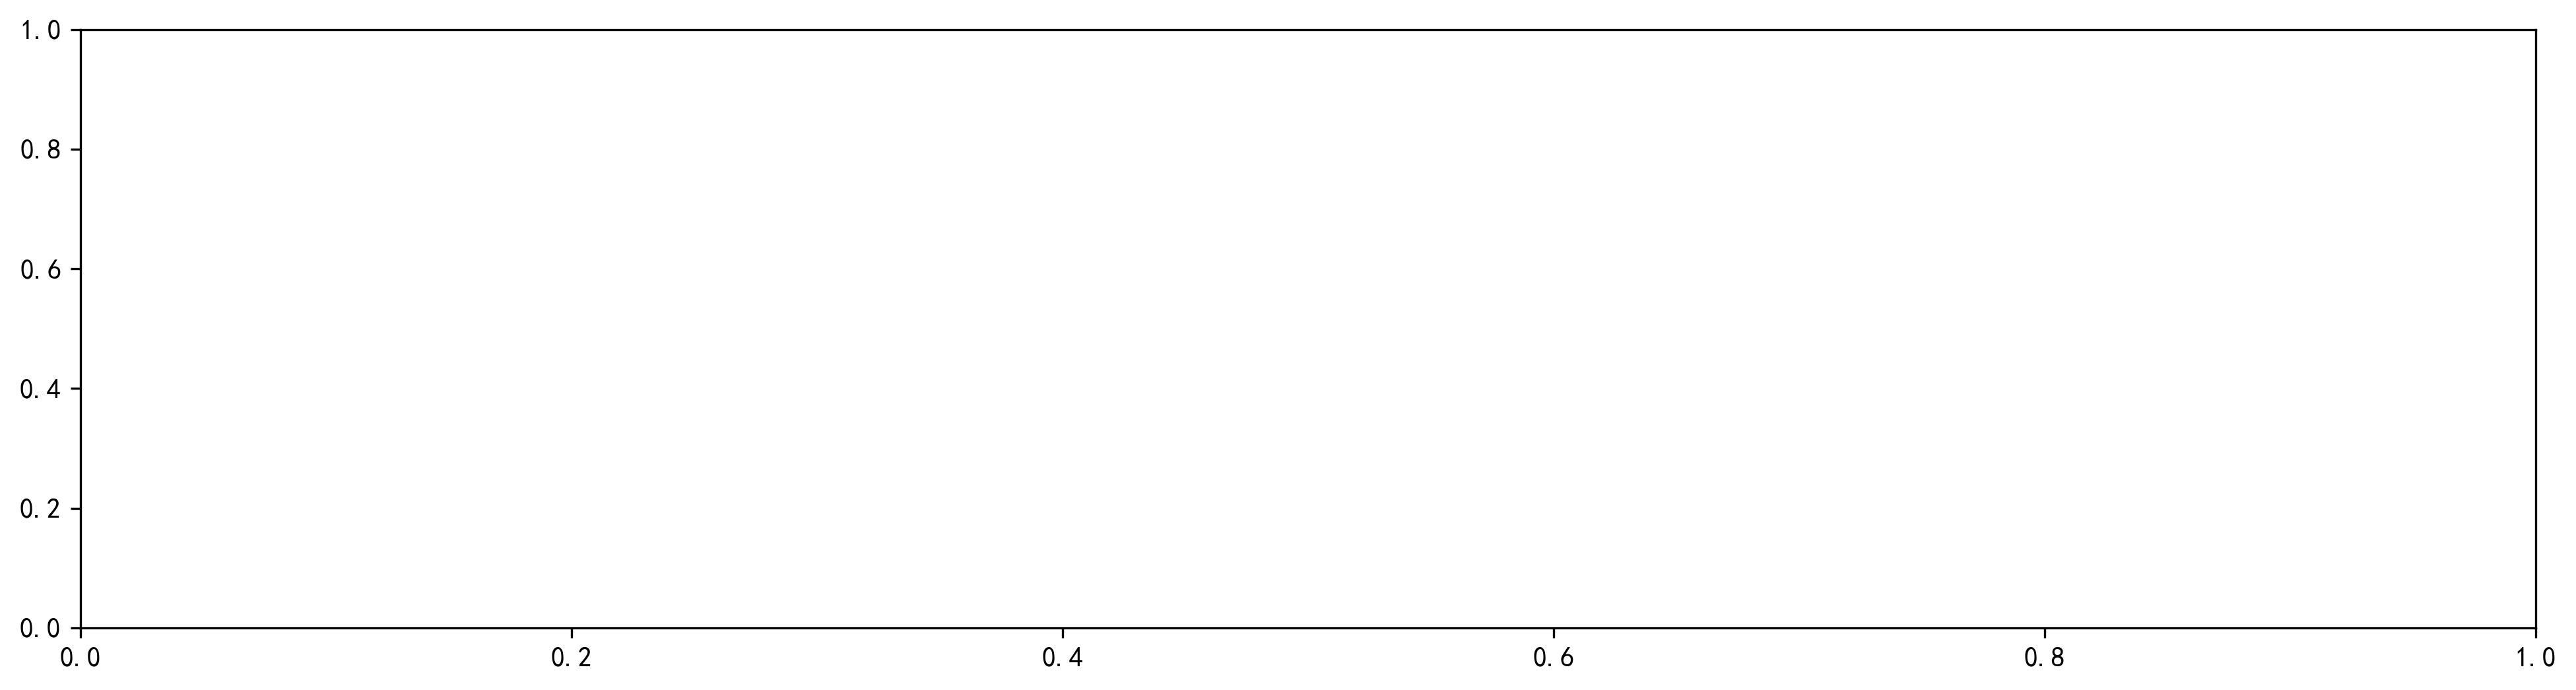

In [10]:
for future_index in xfinai_config.futures_index_map:
    show_result(future_index)